## Aplicación de la técnica de clustering, K-means.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
customers_data = pd.read_csv("/content/drive/MyDrive/FACULTAD/Introducción a la ciencia de datos/TP2/mall_customers.csv")

print(customers_data.describe())
print("------------------------")
print(customers_data.info())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    obje

Como utilizaremos algoritmos basados en distancia euclediana, quitaremos de nuestro conjunto de datos aquellas columnas que sean categoricas, como es el caso de Gender.

La columna CustomerID también será retirada ya que no proporciona información relevante.

In [ ]:
customers_data = customers_data.drop(columns=['Gender','CustomerID'],axis=1)
customers_data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Grafica 3D

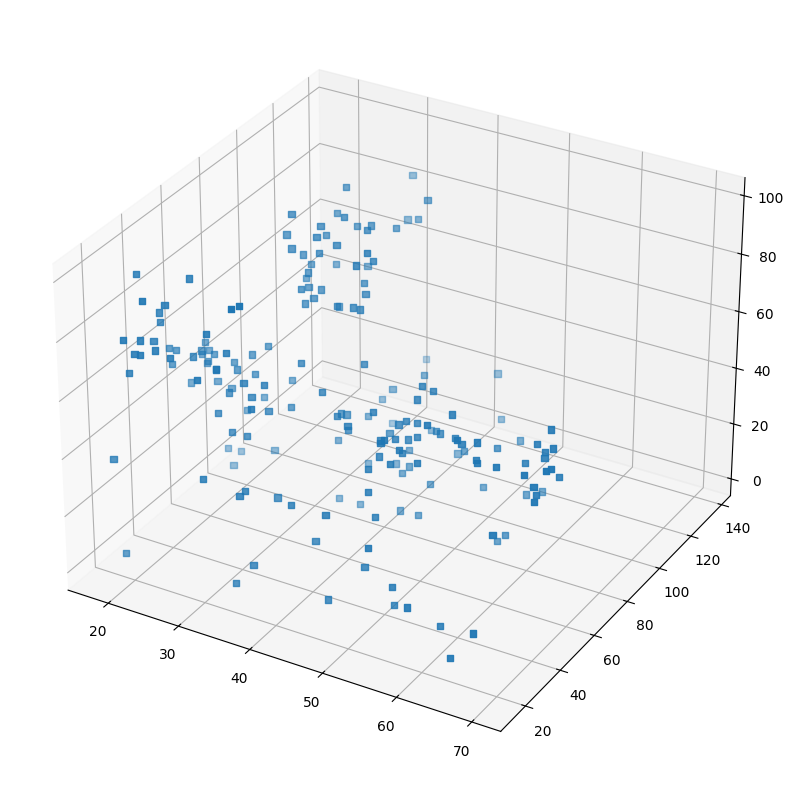

In [ ]:
age, annual_income, spending_score = (customers_data['Age'],customers_data['Annual Income (k$)'],customers_data['Spending Score (1-100)'])
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(age,annual_income,spending_score,marker='s')
plt.show()

Gráfica 2D

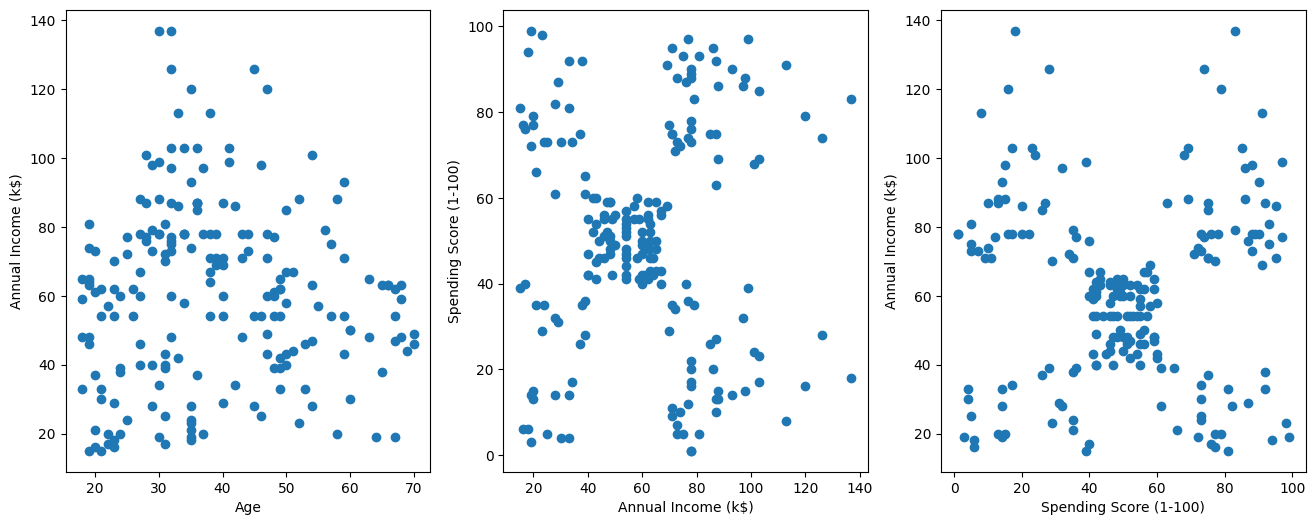

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(16,6))
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i,ax in enumerate(axes[:2]):
  ax.scatter(customers_data[columns[i]],customers_data[columns[i+1]])
  ax.set_xlabel(columns[i])
  ax.set_ylabel(columns[i+1])

axes[2].scatter(customers_data[columns[2]],customers_data[columns[1]])
axes[2].set_xlabel(columns[2])
axes[2].set_ylabel(columns[1])
plt.show()

Vemos si los datos tienen outliers. Esto es importante ya que en base al resultado que obtengamos, veremos si es importante estandarizar los datos. (No siempre es necesario realizar la estandarización.)

In [ ]:
for col in columns:
    pc,tc = customers_data[col].quantile([.25,0.75])
    iqr = tc - pc
    val_sup = tc + 1.5*iqr
    val_inf = pc - 1.5*iqr

    outliers = customers_data[(customers_data[col] > val_sup) | (customers_data[col] < val_inf)]
    print(np.array(outliers))


[]
[[ 32 137  18]
 [ 30 137  83]]
[]


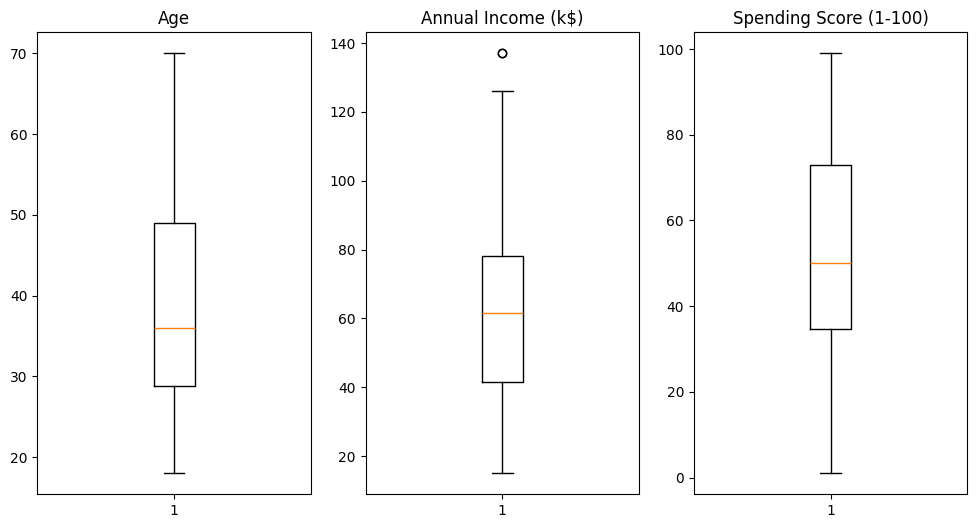

In [ ]:
_,axis = plt.subplots(1,3, figsize=(12,6))

for i,col in enumerate(columns):
  axis[i].boxplot(customers_data[col])
  axis[i].set_title(col)

plt.show()

### 1. ¿Los clientes de mayor edad, con mayor ingreso anual, son los que menos gastan?

Busco el K ideal, utilizando el metodo del codo.

In [ ]:
def graph_WCSS(data):
  WCSS = []
  for i in range(1,11):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(data)
    WCSS.append(kmeans.inertia_)

  plt.plot(range(1,11),WCSS,'x-')
  plt.show()

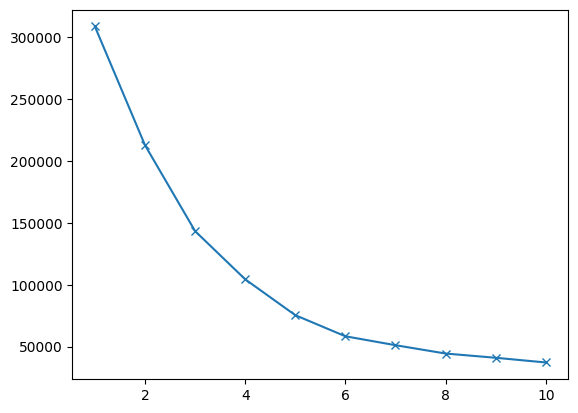

In [ ]:
graph_WCSS(customers_data)

El punto de inflexión se presenta  cuando k=6.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6,verbose=2)
kmeans.fit(customers_data)

Initialization complete
Iteration 0, inertia 104897.0.
Iteration 1, inertia 71484.92306509969.
Iteration 2, inertia 68934.8918130339.
Iteration 3, inertia 68709.11242600337.
Iteration 4, inertia 68336.21171847158.
Iteration 5, inertia 68283.65691410039.
Converged at iteration 5: strict convergence.


KMeans(n_clusters=6, verbose=2)

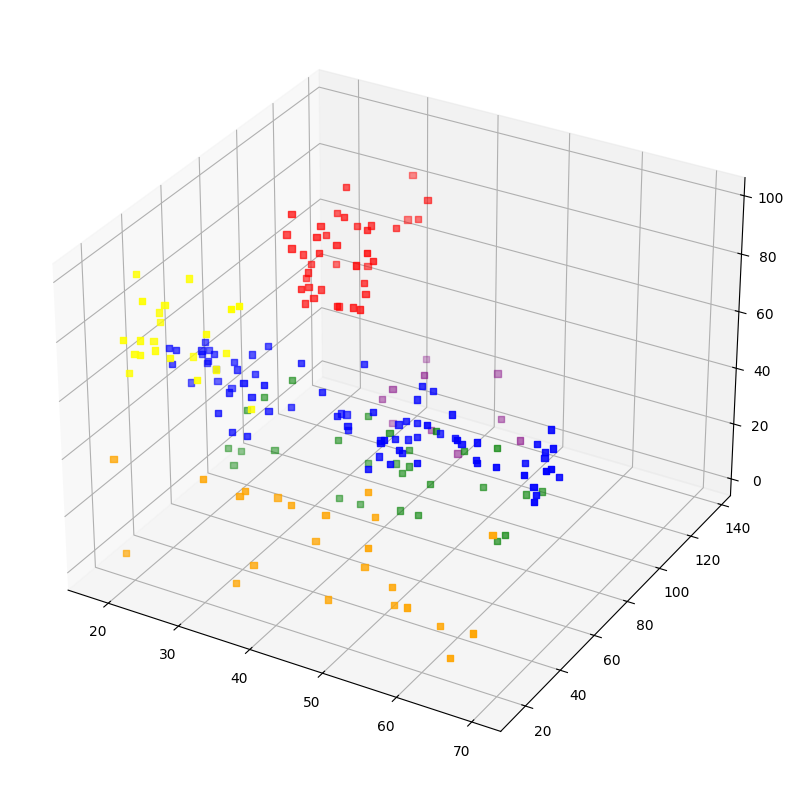

In [ ]:
labels = kmeans.labels_
colors = ["red","green","blue","yellow","purple","orange"]

plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(age, annual_income, spending_score,marker='s',color=[colors[i] for i in labels ])
plt.show()

### 2. ¿Los clientes con mayor ingresos anuales son los que más gastan?

Para ello es necesario utilizar hay que ver la relacion ingreso anual respecto al spending score.

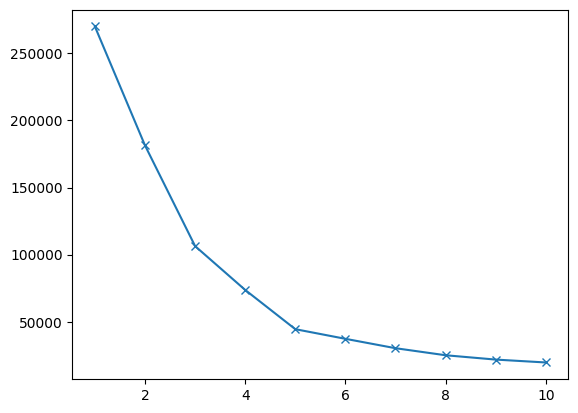

In [ ]:
data_ai_ss = customers_data.loc[:,columns[1]:columns[2]]

graph_WCSS(data_ai_ss)

Encontramos un punto de inflexión para k=5.

In [ ]:
kmeans = KMeans(n_clusters=5,verbose=2)
kmeans.fit(data_ai_ss)

Initialization complete
Iteration 0, inertia 58880.0.
Iteration 1, inertia 50955.017929129215.
Iteration 2, inertia 46797.66086300386.
Iteration 3, inertia 44917.08619298226.
Iteration 4, inertia 44474.83570937371.
Iteration 5, inertia 44448.45544793369.
Converged at iteration 5: strict convergence.
[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


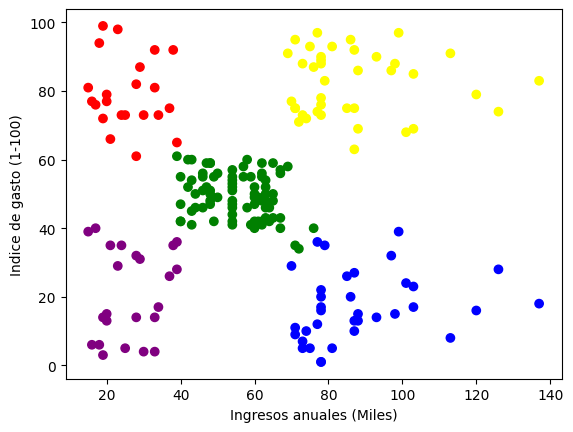

In [ ]:
labels = kmeans.labels_
colors = ["red","blue","green","yellow","purple"]
plt.scatter(data_ai_ss['Annual Income (k$)'],data_ai_ss['Spending Score (1-100)'],color = [colors[i] for i in labels])
plt.xlabel("Ingresos anuales (Miles)")
plt.ylabel("Indice de gasto (1-100)")
plt.show()

Podemos observar lo siguiente:

No necesariamente los que tengan mayor ingresos son los que más gastan. En este caso particular, tenemos que quienes más gastan son tanto los de menor ingreso como los de mayor ingreso. No hay una diferencia importante.

##  Preguntas y respuestas.

### ¿Qué impacto pueden tener los outliers en el resultado del clustering?

Los outliers generan un corrimiento de los centroides y esto genera un sesgo.

### ¿Qué podría pasar si una variable está en una escala mucho mayor que las demás? Dar un ejemplo. ¿Es necesario normalizar o escalar los datos siempre?

Lo que podría pasar es una distorsión de los datos. Aquel dato que tenga una escala mayor a los demás generará un sesgo.

Un ejemplo de esto podría ser caracteristicas tales como edad y sueldo. En este caso, el sueldo va a tener una escala mayor a la edad, y si utilizamos un algoritmo de clustering, lo que sucederá es que el modelo va a agrupar pura y exclusivamente por sueldo, ignorando por completo a la caracteristica edad.

Pero no siempre es necesario normalizar/estandarizar los datos. Para ello debemos verificar si existen valores alejados o qué tan dispersos están, utilizando un boxplot podría bastar ya que ahí podríamos verlo con la altura de la caja y los outliers.

### ¿Qué significa la inercia en el contexto de K-Means?

La inercia o también conocido como Within-Cluster Sum Of Square es una métrica que nos indica que tan similares son los datos en un cluster. Dicho de otra forma: que tan compacto están los datos en un cluster.

Para un conjunto de datos con $n$ puntos, $k$ clusters y centroide $μ_j$:

$$ WCSS = \sum^{k}_{j=1} \sum_{x_i \in C_j} ||x_i - μ_j||^{2}$$

Donde:

$C_i = $ Conjunto de puntos en el cluster $j$.

$x_i$ = un punto de datos.

$μ_j$ = centroide del cluster $j$

$||x_i - μ_j||^{2}$ = distancia euclídea al cuadrado entre el punto y su centroide.

- Si tienen un WSCC muy bajo quiere decir que los puntos son cercanos al centroide.
- Si tienen un WSCC muy alto quiere decir que los puntos están dispersos.

Por lo que se trata de minimizar lo más que se pueda esta metrica, pero con el cuidado de que no sea cercano a cero, pues si esto fuese así, cada punto sería un cluster (Aumentas el k y se hace cercano a n).

### ¿Por qué la inercia siempre disminuye al aumentar el número de clusters k? ¿Qué puede decir respecto de la inercia vs. el número de clusters?

Esto se debe a que los centroides están cada vez más cerca de nuestros datos. Puede llegar al punto donde nuestro numero de clusters sean igual al numero de datos y cada centroide sería igual a k.

Por eso es que se busca minimizar utilizando un gráfico inercia vs numero de clusters. Con este gráfico obtenemos un k optimo. Decimos que un k es optimo cuando observamos que la curva comienza a amesetarse (el WCSS no cambia demasiado, overfitea)